## Statistical Inference with Confidence Intervals


In this tutorial, we're going to review how to calculate confidence intervals of population proportions and means.

To begin, let's go over some of the material from this week and why confidence intervals are useful tools when deriving insights from data.

### Why Confidence Intervals?



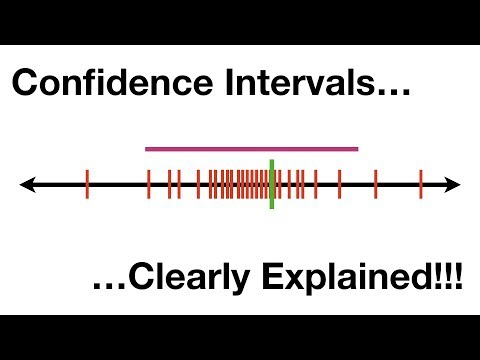

In [2]:
from IPython.display import YouTubeVideo

YouTubeVideo('TqOeMYtOc1w', width=800, height=300)

Confidence intervals are a calculated range or boundary around a parameter or a statistic that is supported mathematically with a certain level of confidence.  

For example, in the lecture, we estimated, with 95% confidence, that the population proportion of parents with a toddler that use a car seat for all travel with their toddler was somewhere between 82.2% and 87.7%.

This is *__different__* than having a 95% probability that the true population proportion is within our confidence interval.

Essentially, if we were to repeat this process, 95% of our calculated confidence intervals would contain the true proportion.

### How are Confidence Intervals Calculated?

Our equation for calculating confidence intervals is as follows:

$$Best\ Estimate \pm Margin\ of\ Error$$

Where the *Best Estimate* is the **observed population proportion or mean** and the *Margin of Error* is the **t-multiplier**.


**In a sample of 659 parents with a toddler, 540 stated they use a car set for all travel with their toddler. Calculate the 95% confidence interval.**

In [4]:
import numpy as np

sample_size  = 659
said_yes = 540
p_hat = said_yes/ sample_size

T_star = 1.96 # because of 95% confidence level

se = np.sqrt((p_hat * (1 - p_hat))/sample_size)   # standard error
print(p_hat-T_star*se,p_hat+ T_star*se)

0.7900537499137914 0.8487929875672404


In [27]:
p_hat = 0.43
T_star = 1.96
sample_size = 232
se =np.sqrt((p_hat * (1 - p_hat))/sample_size)  
print(p_hat-T_star*se,p_hat+ T_star*se)

0.36629350165772345 0.49370649834227653


Observation:
    Based on our sample of 659 parents with toddlers. With 95 percent confidence, we'd estimate between 79% and up to 85% percent of all parents report they use a car seat for all travel.


Well, let's think about that a moment. **Does the interval we have here, at 79% to that 85%, does it contain the sample proportion of parents with toddlers who reported they use a car seat for all travel? Does it contain the sample proportion? Think about that. Is the sample proportion in this interval?**

In [10]:
p_hat

0.8194233687405159

Of course it is. Most certainly is in the interval because we centered the interval at that best guess, that 81 percent, that was our best estimate.


**Does our confidence interval contain the population proportion of all parents with toddlers who report they use a car seat for all travel? What did you think?**

We would have to answer this as we don't know. In order for me to be able to say whether this answer would be a yes, it's in there or no, it's not, I would have to know the value of that population proportion. That population proportion is a fixed value but it still unknown. I don't know what it is. That's why we designed a study to be able to gather data that's representative, to be able to estimate its value. So, I cannot tell you whether this particular already made interval has the true proportion in it or not. So, that leads us to one way that might often be incorrectly interpreting that confidence level. 


We don't want to think of it as a chance or probability that there's a 95 percent chance the population proportion is in our interval that we just made. That intervals are already computed, its fixed. That population proportion, the true rate for our population is a fixed number too. We're trying to learn what it is but it ends up either being in between these two values or it's not. 

In some sense, the probability would either be one or zero. We just don't know which of those two answers it is.



**The confidence level refers instead then to the confidence we have in the process we use to make our interval. Not as a probability after our interval was made but how confident we are about the statistical procedure that was used.**


[The t-multiplier is calculated based on the degrees of freedom and desired confidence level](https://www.youtube.com/watch?v=DcWATePtE1s).  For samples with more than 30 observations and a confidence level of 95%, the t-multiplier is 1.96

The equation to create a 95% confidence interval can also be shown as:

$$Population\ Proportion\ or\ Mean\ \pm (t-multiplier *\ Standard\ Error)$$

Lastly, the Standard Error is calculated differenly for population proportion and mean:

$$Standard\ Error \ for\ Population\ Proportion = \sqrt{\frac{Population\ Proportion * (1 - Population\ Proportion)}{Number\ Of\ Observations}}$$

$$Standard\ Error \ for\ Mean = \frac{Standard\ Deviation}{\sqrt{Number\ Of\ Observations}}$$

$$Conservative \ Standard\ Error  = \frac{1}{2\sqrt{Number\ Of\ Observations}}$$


In [5]:
tstar = 1.96 # t-multiplier
p = .85
n = 659

se = np.sqrt((p * (1 - p))/n)
se

0.01390952774409444

In [6]:
lcb = p - tstar * se
ucb = p + tstar * se
(lcb, ucb)

(0.8227373256215749, 0.8772626743784251)

In [12]:
ce = 1/(2*np.sqrt(n)) # p = 0.5
ce

0.019477234678290496

In [14]:
tstar = 2 #approx
lcb = p - tstar * ce
ucb = p + tstar * ce
(lcb, ucb)

(0.811045530643419, 0.888954469356581)

## Sample size determination

**Margin of Error** is only dependent on:
    1) our confidence level (typically 95%)
    2) our sample size
    
**So let's say that now what sample size would we need to have a 95% conservative confidence interval with a margin error of only 3%.**

For 95% Confidence,

$$Margin \ of\ Error  = \frac{1}{\sqrt{Number\ Of\ Observations}}$$

If Margin of error is known,we can find the sample size as well.

In [7]:
import statsmodels.api as sm

In [8]:
sm.stats.proportion_confint(n * p, n)

(0.8227378265796143, 0.8772621734203857)

Now, lets take our Cartwheel dataset introduced in lecture and calculate a confidence interval for our mean cartwheel distance:

In [36]:
import pandas as pd

df = pd.read_csv("dataset/Cartwheeldata.csv")

In [37]:
df.head()

,ID,Age,Gender,GenderGroup,Glasses,GlassesGroup,Height,Wingspan,CWDistance,Complete,CompleteGroup,Score
0,1,56,F,1,Y,1,62.0,61.0,79,Y,1,7
1,2,26,F,1,Y,1,62.0,60.0,70,Y,1,8
2,3,33,F,1,Y,1,66.0,64.0,85,Y,1,7
3,4,39,F,1,N,0,64.0,63.0,87,Y,1,10
4,5,27,M,2,N,0,73.0,75.0,72,N,0,4


In [38]:
mean = df["CWDistance"].mean()
sd = df["CWDistance"].std()
n = len(df)


In [39]:
tstar = 2.064

se = sd/np.sqrt(n)

In [40]:
lcb = mean - tstar * se
ucb = mean + tstar * se
(lcb, ucb)

(76.26382957453707, 88.69617042546294)

In [41]:
sm.stats.DescrStatsW(df["CWDistance"]).zconfint_mean()

(76.57715593233026, 88.38284406766975)

**What sample size would we need to have a 95% (conservative) confidence interval with a Margin of Error og only 3% (0.03)**
MoE = 1/sqrt(n)

n = (1/MoE)^2
n = (1/0.03)^2
n = 1/0.0009
n = 1111.11

**What if we want 3% MoE @99% Confidence?**
p^ +- Z 1/(2*sqet(n))

MoE = Z 1/(2*sqrt(n))

n = (Z/(2 MoE))^2

Z* = 2.576 (99%) MoE = 0.03

Thus, n = 1843.27 n = 1844

90% -> 1.645

95% -> 1.96

98% -> 2.326

99% -> 2.576

# Practice Quiz: All About Confidence Intervals


1) Use the following background to answer the corresponding questions.

Background: Information devices, such as smartphones, tablets, laptops, and E-readers, are widely used by Americans today. A survey conducted by Pew Research Center in January of 2018, asked a random sample of Americans to report which of these specific information devices they own. The study revealed that 53% of the Americans who were surveyed own a tablet (based on a random sample of 526 Americans). From these results, the 90% confidence interval for the population proportion of Americans who own a tablet was reported to be (0.4942, 0.5658).

Which of the following corresponds to the value of 53%?

Answer: Sample proportion ,Statistic, Estimate of the population proportion

2) Use the following background to answer the corresponding questions.

Background: Information devices, such as smartphones, tablets, laptops, and E-readers, are widely used by Americans today. A survey conducted by Pew Research Center in January of 2018, asked a random sample of Americans to report which of these specific information devices they own. The study revealed that 53% of the Americans who were surveyed own a tablet (based on a random sample of 526 Americans). From these results, the 90% confidence interval for the population proportion of Americans who own a tablet was reported to be (0.4942, 0.5658).

Which of the following would be considered an appropriate interpretation of the given 90% confidence interval?

Ans: With 90% confidence, we estimate that the population proportion of Americans who own a tablet is between 49.42% and 56.58%.

3) 
Use the following background to answer the corresponding questions.

Background: Information devices, such as smartphones, tablets, laptops, and E-readers, are widely used by Americans today. A survey conducted by Pew Research Center in January of 2018, asked a random sample of Americans to report which of these specific information devices they own. The study revealed that 53% of the Americans who were surveyed own a tablet (based on a random sample of 526 Americans). From these results, the 90% confidence interval for the population proportion of Americans who own a tablet was reported to be (0.4942, 0.5658).

How would the width of a 95% confidence interval compare to that of the 90% interval given? 

Ans: wider

4)
Use the following background to answer the corresponding questions.

Background: Information devices, such as smartphones, tablets, laptops, and E-readers, are widely used by Americans today. A survey conducted by Pew Research Center in January of 2018, asked a random sample of Americans to report which of these specific information devices they own. The study revealed that 53% of the Americans who were surveyed own a tablet (based on a random sample of 526 Americans). From these results, the 90% confidence interval for the population proportion of Americans who own a tablet was reported to be (0.4942, 0.5658).

Which of the following best describes a confidence level in the context of the problem?

Ans:
If we repeated this study many times, each time producing a new sample (of the same
size) from which a 90% confidence interval is computed, then 90% of the
resulting confidence intervals would be expected to contain the population
proportion of all Americans who own a tablet. 

5) Use the following background to answer the corresponding questions.

Background: Information devices, such as smartphones, tablets, laptops, and E-readers, are widely used by Americans today. A survey conducted by Pew Research Center in January of 2018, asked a random sample of Americans to report which of these specific information devices they own. The study revealed that 53% of the Americans who were surveyed own a tablet (based on a random sample of 526 Americans). From these results, the 90% confidence interval for the population proportion of Americans who own a tablet was reported to be (0.4942, 0.5658).

Based on the reported 90% confidence interval (and no additional calculations), does it appear that a majority of Americans own a tablet? Select the answer with the appropriate explanation.

Ans: The whole interval must be above 50%.

6) Use the following background to answer the corresponding questions.

Background: Information devices, such as smartphones, tablets, laptops, and E-readers, are widely used by Americans today. A survey conducted by Pew Research Center in January of 2018, asked a random sample of Americans to report which of these specific information devices they own. The study revealed that 53% of the Americans who were surveyed own a tablet (based on a random sample of 526 Americans). From these results, the 90% confidence interval for the population proportion of Americans who own a tablet was reported to be (0.4942, 0.5658).

Another researcher is looking to conduct a similar survey to find out the proportion of all Michigan residents own a tablet. What minimum sample size does the researcher need in order to create a 95% conservative confidence interval with a margin of error of no more than 3%? (Do not use the approximate value for "a few" - use the more precise standard value.)

Ans: The researcher would need a sample of at least 1068 Michigan residents

7) Use the following background to answer the corresponding questions.

Background: Information devices, such as smartphones, tablets, laptops, and E-readers, are widely used by Americans today. A survey conducted by Pew Research Center in January of 2018, asked a random sample of Americans to report which of these specific information devices they own. The study revealed that 53% of the Americans who were surveyed own a tablet (based on a random sample of 526 Americans). From these results, the 90% confidence interval for the population proportion of Americans who own a tablet was reported to be (0.4942, 0.5658).

Is the following an appropriate statement about the given 90% confidence interval? “We estimate that 53% of all Americans own a tablet with a 90% margin of error of 3.58%.”

ans: Appropriate

# Sample Size & Assumptions

1) A poll was done at a public University asking undergraduate students whether they are an in state student or out of state student. A sample of 232 undergraduate students at the University were asked and it was revealed that 43% of students were from out of state. From the results, a 95% confidence interval was calculated to be (0.3663, 0.4937).

Which of the following corresponds to the value of 43%? 

Ans: Statistic, Sample proportion, Estimate of the population proportion


2) In order to make the above confidence interval researchers first had to check their assumptions. Select all the appropriate assumptions that are needed to create a one population proportion confidence interval.


Ans:
 - The sample proportion comes from data that is considered a simple random sample
- The number of respondents who replied "out of state" must be at least 10

- The number of respondents who replied "in state" must be at least 10

3) What is the margin of error for the given 95% confidence interval above?

Ans: 0.0637

4) A larger sample was taken and the same sample proportion was found. How would the width of the 95% confidence interval change from our initial interval?

Ans: Shorten

5) If the researcher would like to have their confidence interval be narrower, more precise, which of the following would achieve this?

Ans: Change the confidence level to 90%

6) Question 6
What minimum sample size does the researcher need in order to create a 95% conservative confidence interval with a margin of error of no more than 4%?

$$Margin \ of\ Error  = \frac{1}{\sqrt{Number\ Of\ Observations}}$$


Ans: 601

7) What minimum sample size does the researcher need in order to create a 98% conservative confidence interval with a margin of error of no more than 3%?

Ans: 1503


10) Based on the reported 95% confidence interval (and no additional calculations), does it appear there is a minority of undergraduate students at the University that are from out of state?

Ans: 

Yes, because the entire interval is below 50%

# Estimating a Difference in Population Proportions with Confidence

Research question: what is the difference of population proportions of parents reporting that their children aged 6-18 have had some swimming lessons between white children and black children?


Populations= All parents of white children age 6-18 and all parents of black children age 6-18.
Parameter of Interest = Difference between population proportions (p1-p2)
1=white, 2 = black

Survey results:

- A sample of 247 parents of black children,aged 6-18 was taken with 91 said that their child has had some swimming lessons.
- A sample of 988 parents of white children aged 6-18, and we found that 543 said that their child has had some swimming lessons

Now, it's hard to look at just those numbers and come up with a really clear answer to our question of what is the difference in the population proportions of children who have taken swimming lessons. So, what we'll want to do is look at confidence interval.

$$\hat{p_1}-\hat{p_2} \pm 1.96  \sqrt{\frac{\hat{p_1}(1-\hat{p_1})}{n_1}+\frac{\hat{p_2}(1-\hat{p_2})}{n_2}} $$


In [31]:
white_N = 988
white_s = 543
p1 = white_s/white_N
p1

0.5495951417004049

In [32]:
bl_N = 247
bl_s = 91
p2 = bl_s/bl_N
p2

0.3684210526315789

In [33]:
p1 - p2

0.18117408906882598

 the parents of white children report that their child has had swimming lessons 18 percent more than the parents of black children. 

In [34]:
wd = (p1*(1-p1))/white_N
bk = (p2*(1-p2))/bl_N

se = 1.96* np.sqrt(wd+bk)
se

0.06768670474707392

In [35]:
((p1-p2)-se,(p1-p2)+se)

(0.11348738432175207, 0.2488607938158999)

our confidence interval goes from about 11 percent to about 25 percent.With 95 percent confidence, the population proportion of parents with white children who have taken swimming lessons is roughly 11 percent to roughly 25 percent higher than the population proportion of parents with black children who have taken swimming lessons.

# Estimating a Population Mean with Confidence

Constructing a confidence  95% interval, confidence interval for this mean cartwheel distance for our population of all such adults

In [42]:
X = df['CWDistance']

In [43]:
X.describe()

count     25.000000
mean      82.480000
std       15.058552
min       63.000000
25%       70.000000
50%       81.000000
75%       92.000000
max      115.000000
Name: CWDistance, dtype: float64

Confidence interval
Best estimate +- MoE
Sample mean difference +- "a few" * estimated standard error

$$\bar{x} \pm t^* (\frac{s}{\sqrt{n}})$$

t comes from a t distribution with n-1 degrees of freedom.
95% confidence
n = 25 -> t = 2.064
n = 1000 -> t = 1.962

**t means we will have a slightly heavier tail and our confidence interval will be a little bit more conservative as we have estimated that standard error.**

In [49]:
Mean =  82.48 # xbar
std = 15.06 #s
n = 25 # observations
tst = 2.064

pm = np.array([+1, -1])
moe =  tst*(std/np.sqrt(5))
mean + pm * moe

array([96.38111585, 68.57888415])

In [50]:
moe

13.901115848345412

The population mean cartwheel distance for all adults is estimated to be between the two numbers that we calculated
